# 1. Introduction

[Colab](https://colab.research.google.com/drive/19hszbWv8aGZuhtiSckkQOFKui3RIXmb9?usp=sharing)  
Write your answers in the Intro part of your Notebook

1. To get started, please write 5 examples of ML methods application in life. What is the benefit of using machine learning methods in each of your examples?  
- рекомендация контента. польза: релевантней контент, лояльность клиента
- распознование текста. польза: дешевая оцифровка
- прогнозирование спроса на товары. польза: товар вовремя, прибыль продавцу
- поиск залежей ископаемых. польза: ресурсы для человечества
- прогнозирование происшествий. польза: безопасность для землян  
2. Use classification of tasks in the introduction to decide what class you can assign for the tasks from the table above and for the 5 examples you provided.  
- рекомендация контента - регрессия
- распознование текста - классификация
- прогнозирование спроса на товары - регрессия
- поиск залежей ископаемых - классификация/без учителя
- прогнозирование происшествий - классификация  
3. Please think and suppose, what is the difference between multiclass and multilabel.  
- мультикласс это много классов каждый из которых взаимоисключающий
- мультлейбл это несколько меток для одной группы  
4. Is an example case with housing prices from theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?  
- думаю можно свести регрессию к классификации если определить например ценовые категории и искать соттветсвенно ближайшую наиболее вероятную  

# 2. Intro data analysis

## 2.1 Import libraries pandas, numpy, sklearn, lightgbm, scipy, statsmodels, matplotlib, seaborn. Use pip install if it’s necessary

### Install packages

In [4]:
! pip3.11 install scikit-learn statsmodels lightgbm -q

In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Load data from kaggle with pandas. You are need only table data and train.json

In [ ]:
! pip install kaggle
! mkdir .kaggle
! chmod 600 .kaggle/kaggle.json
! kaggle competitions download two-sigma-connect-rental-listing-inquiries
! unzip two-sigma-connect-rental-listing-inquiries.zip
! unzip data/train.json.zip
! unzip data/test.json.zip

In [7]:
df = pd.read_json('data/train.json')
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


## 2.3 What is the size of your data?

In [7]:
df.shape

(49352, 15)

## 2.4 Print the list of columns. Which column is a target?

In [8]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

target is 'price' column

## 2.5 Make a fast analysis of the data: use methods info(), describe(), corr(). Explain the results of outputs. Are there any empty columns?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


пустых столбцов нет

In [10]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [11]:
df.corr()

ValueError: could not convert string to float: '8579a0b0d54db803821a35a4a615e97a'

корреляция не может отработать тк столбец 'interest_level' не числовой

## 2.6 We’ll work only with 3 features: 'bathrooms',  'bedrooms', 'interest_level' and with target column ‘price’. Make a dataframe with these columns only.

In [10]:
df_working = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df_working.head(5)

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795


# 3. Statistical data analysis

## 3.1 To start with statistical data analysis we recommend you refresh basic knowledge of statistics, such as Mean / Median / Mode / Variance / Standard Deviation. Also you are welcome to be free with distributions (Discrete uniform Distribution, Bernoulli Distribution, Binomial Distribution, Poisson Distribution, Normal Distribution, Exponential Distribution). Please make sure that you know the definitions of outliers, percentiles, confidential intervals. The article will be later


## 3.2 Make a quick sense with this article(https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf). Please take attention to such aspects as distributions and histograms, boxplot, outliers, kernel density function.

## 3.3 Target analysis

### 3.3.1 Plot a histogram to understand the distribution of the target. Is it all clear?


<Axes: xlabel='price', ylabel='Count'>

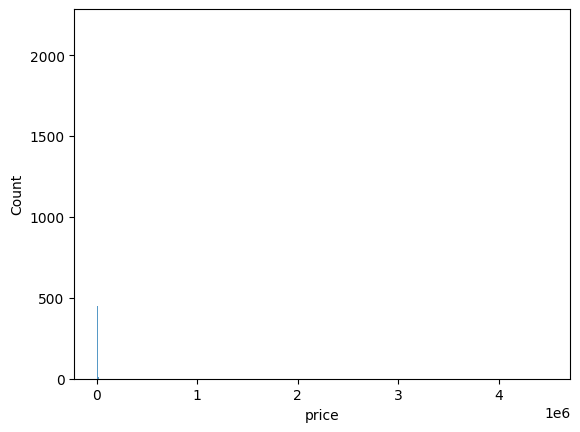

In [13]:
sns.histplot(df_working["price"])

Видно что гистограмма получилась неинформативная, нужно убрать выбросы

### 3.3.2 The next step is boxplot(). What can you say about target? Are there any outliers?

<Axes: xlabel='price'>

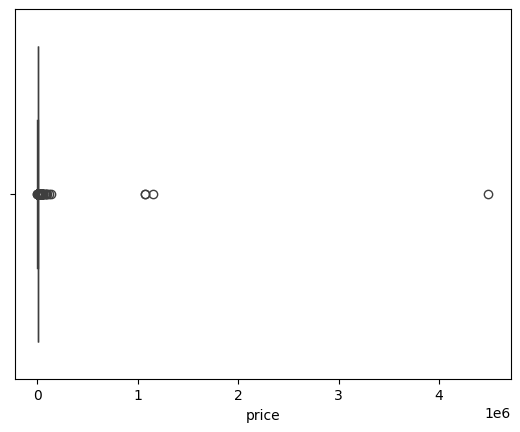

In [14]:
sns.boxplot(x=df_working["price"])

как и ожидалось есть очень сильные выбросы, удалим их

### 3.3.3 Drop rows which are out of the 1 and 99 percentile by the target column.

In [8]:
def cut_by_quantile(df, col_name, q_small, q_big):
    q_low, q_high = df[col_name].quantile([q_small, q_big])
    return df[(df[col_name] > q_low) & (df[col_name] < q_high)]

In [11]:
df_no_outliers = cut_by_quantile(df_working, 'price', 0.01, 0.99)

### 3.3.4 Plot a histogram for price again. Explain the result.

<Axes: xlabel='price', ylabel='Count'>

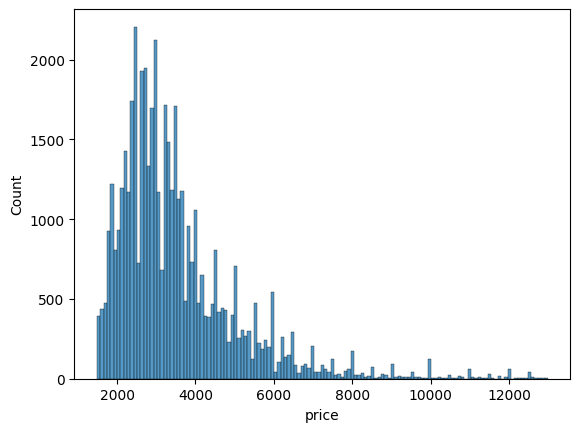

In [17]:
sns.histplot(df_no_outliers["price"])

теперь все как должно быть
похоже на биномиальное распределение

## 3.4 Features analysis

### 3.4.1 What is the type of column 'interest_level'?

In [18]:
df_no_outliers['interest_level'].dtype

dtype('O')

### 3.4.2 Print the values of this column. How many items each value contains?

In [19]:
df_no_outliers['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [20]:
df_no_outliers['interest_level'].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

### 3.4.3 Decode these values. For example, you may replace each value to 0, 1 or 2.

In [12]:
df_no_outliers['interest_level'] = df_no_outliers['interest_level'].astype('category').cat.codes

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_82663/2351672783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['interest_level'] = df_no_outliers['interest_level'].astype('category').cat.codes


### 3.4.4 Plot histograms for features 'bathrooms',  'bedrooms'. Are there outliers?

<Axes: xlabel='bedrooms', ylabel='Count'>

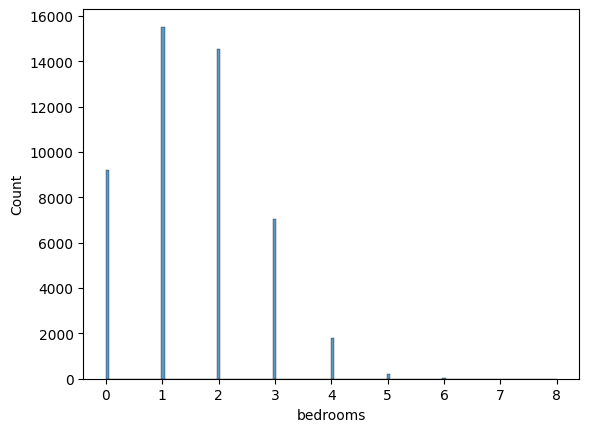

In [22]:
sns.histplot(df_no_outliers["bedrooms"])


<Axes: xlabel='bathrooms', ylabel='Count'>

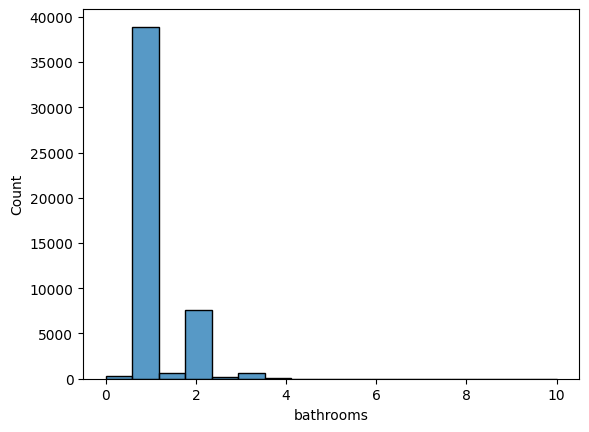

In [24]:
sns.histplot(df_no_outliers["bathrooms"])

<Axes: xlabel='bedrooms'>

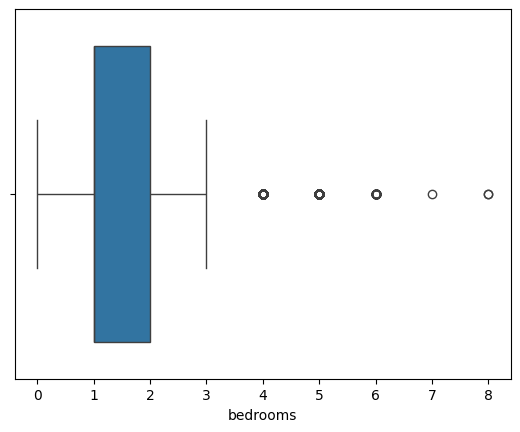

In [25]:
sns.boxplot(x=df_no_outliers["bedrooms"])

<Axes: xlabel='bathrooms'>

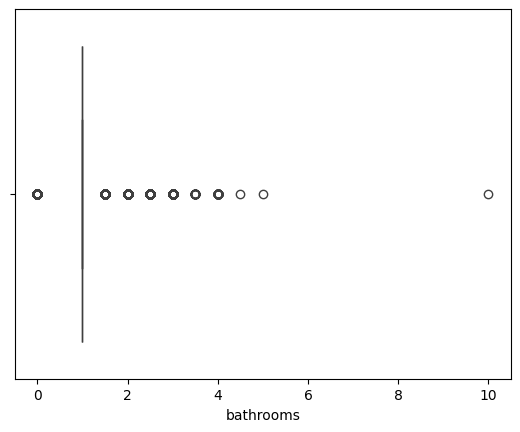

In [26]:
sns.boxplot(x=df_no_outliers["bathrooms"])

выбросы есть

In [13]:
df_no_outliers = cut_by_quantile(df_no_outliers, 'bedrooms', 0.01, 0.99)

In [14]:
df_no_outliers = cut_by_quantile(df_no_outliers, 'bathrooms', 0.01, 0.99)

<Axes: xlabel='bedrooms'>

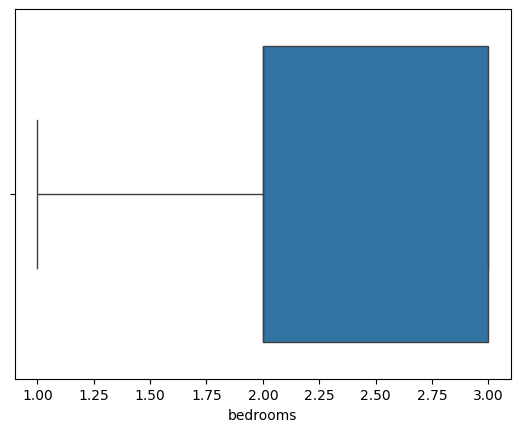

In [14]:
sns.boxplot(x=df_no_outliers["bedrooms"])

<Axes: xlabel='bathrooms'>

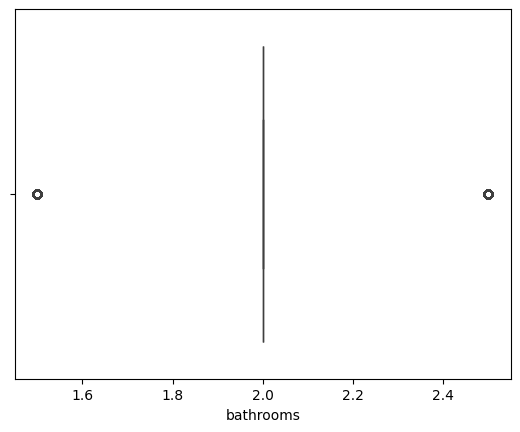

In [32]:
sns.boxplot(x=df_no_outliers["bathrooms"])

## 3.5 Complex analysis

### 3.5.1 Plot a correlation matrix to understand correlation between features and target. Plot a heatmap plot for correlation matrix. Is there a correlation?

In [15]:
df_no_outliers.columns

Index(['bathrooms', 'bedrooms', 'interest_level', 'price'], dtype='object')

In [17]:
corr = df_no_outliers[['bathrooms', 'bedrooms', 'price', 'interest_level']].corr()
corr

,bathrooms,bedrooms,price,interest_level
bathrooms,1.000000,0.149489,0.258946,0.023671
bedrooms,0.149489,1.000000,0.017697,0.094521
price,0.258946,0.017697,1.000000,-0.099899
interest_level,0.023671,0.094521,-0.099899,1.000000


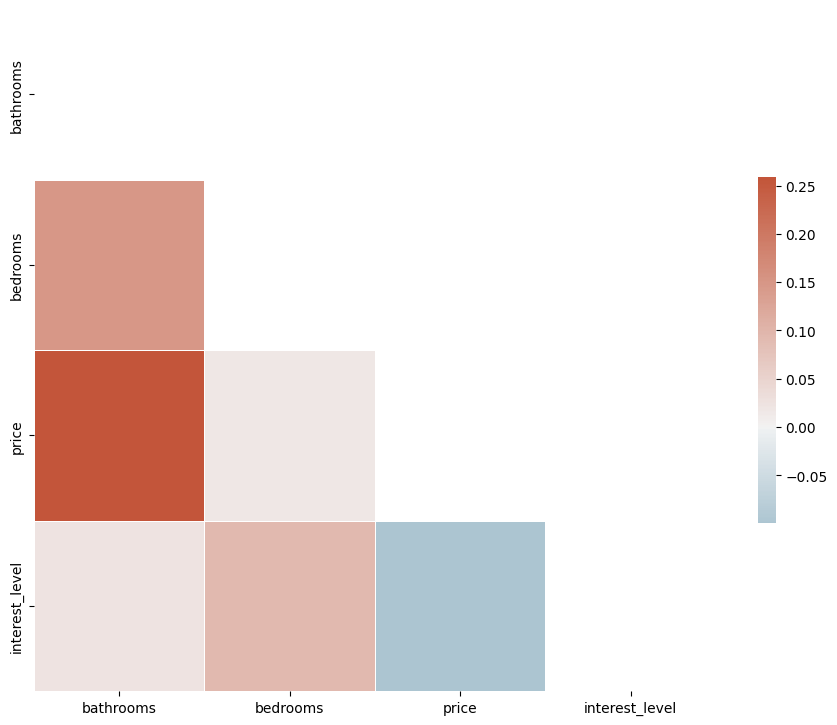

In [18]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11,  9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230,  20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

корреляции низкие, максимум 0,25

### 3.5.2 Use a scatter plot to visualize correlation between features and target. You should return 3 plots, where X axis it target, and Y axis is a feature.

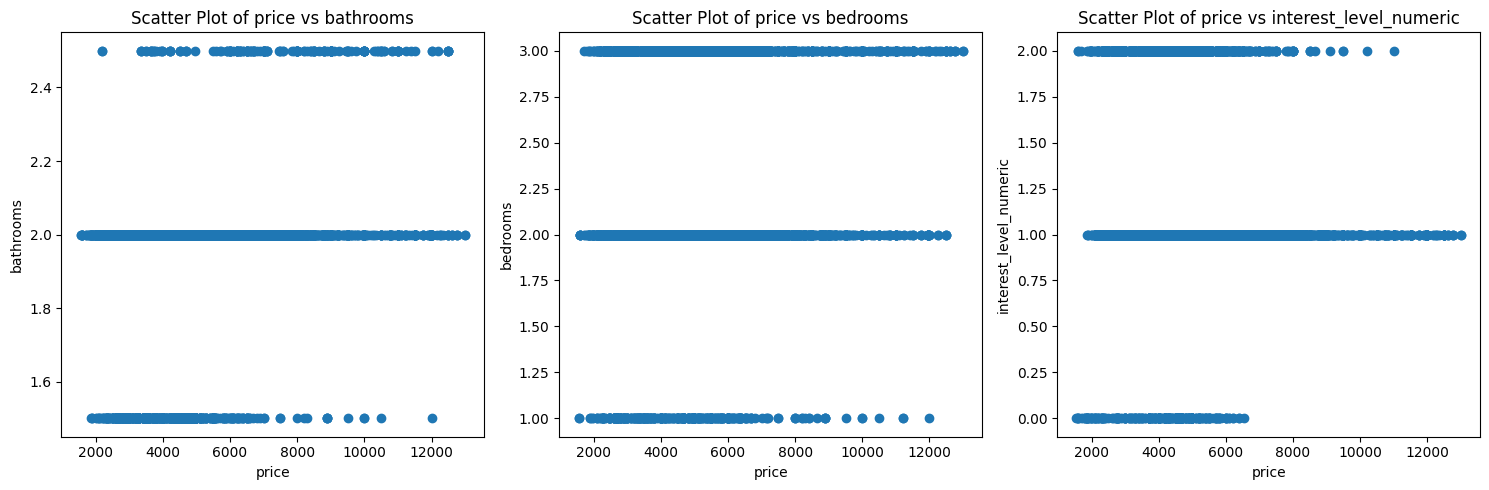

In [41]:
# Create three scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_no_outliers['price'], df_no_outliers['bathrooms'])
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('Scatter Plot of price vs bathrooms')

plt.subplot(1, 3, 2)
plt.scatter(df_no_outliers['price'], df_no_outliers['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('Scatter Plot of price vs bedrooms')

plt.subplot(1, 3, 3)
plt.scatter(df_no_outliers['price'], df_no_outliers['interest_level'])
plt.xlabel('price')
plt.ylabel('interest_level')
plt.title('Scatter Plot of price vs interest_level')

plt.tight_layout()
plt.show()

по графикам тоже видно что корреляций нет

# 4. Generate features

## 4.1 This step is very wide. You may create all features you want. For example, you may add 3 new features, which are squared: 'bathrooms_squared’, 'bedrooms_squared’, ‘'interest_level_squared'. Plot a correlation matrix with new features. Are new features more correlated with target then basic features?

In [43]:
df_no_outliers['bedrooms_squared'] = df_no_outliers['bedrooms']**2
df_no_outliers['bathrooms_squared'] = df_no_outliers['bathrooms']**2
df_no_outliers['interest_level_squared'] = df_no_outliers['interest_level']**2

In [44]:
df_no_outliers.corr()

,bathrooms,bedrooms,interest_level,price,interest_level_numeric,bedrooms_squared,bathrooms_squared,interest_level_squared
bathrooms,1.000000,0.149489,0.023671,0.258946,0.023671,0.118524,0.993867,0.038343
bedrooms,0.149489,1.000000,0.094521,0.017697,0.094521,0.990620,0.144448,0.139620
interest_level,0.023671,0.094521,1.000000,-0.099899,1.000000,0.095355,0.015139,0.959498
price,0.258946,0.017697,-0.099899,1.000000,-0.099899,0.004869,0.268178,-0.161464
interest_level_numeric,0.023671,0.094521,1.000000,-0.099899,1.000000,0.095355,0.015139,0.959498
bedrooms_squared,0.118524,0.990620,0.095355,0.004869,0.095355,1.000000,0.115734,0.141472
bathrooms_squared,0.993867,0.144448,0.015139,0.268178,0.015139,0.115734,1.000000,0.026295
interest_level_squared,0.038343,0.139620,0.959498,-0.161464,0.959498,0.141472,0.026295,1.000000


'price' с 'bathrooms'(0.268) коррелирует сильнее чем просто c 'bathrooms_squared'(0.258)

## 4.2 To train model here we will not use your new features. Remember this example and use it in Lecture 2.

## 4.3 Read this sklearn info about PolynomialFeatures: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

## 4.4 To use PolynomialFeatures we first need to split data to train and test samples. We already made it for you, please read the train and test data.

In [15]:
df_train = df_no_outliers[['bathrooms', 'bedrooms', 'price']]
df_test = pd.read_json('data/test.json')
df_test = df_test[['bathrooms', 'bedrooms', 'price']]

In [76]:
X_train = df_train.drop(['price'], axis=1)
Y_train = df_train[['price']]

X_test = df_test.drop(['price'], axis=1)
Y_test = df_test[['price']]

## 4.5 Initialize PolynomialFeatures() with the degree of 10.

In [35]:
poly = PolynomialFeatures(degree=10)

## 4.6 Apply PolynomialFeatures() to fit and transform your train and test data.

In [36]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [37]:
X_train_poly.size

462660

In [20]:
X_test_poly.size

4927494

# 5. Now you need to train 3 models: linear regression, decision tree and native model. We will use it as black boxes without deep understanding.

## 5.1 Result table.

Create two empty pandas DataFrames with columns ‘model’, ‘train’, ‘test’. Let’s the first be called result_MAE, and the second result_RMSE. We will fill these tables with results of models.




In [107]:
result_MAE = pd.DataFrame({'model': [], 'train': [], 'test': []})
result_RMSE = pd.DataFrame({'model': [], 'train': [], 'test': []})

## 5.2 Linear Regression

### 5.2.1 Initialize linear regression from sklearn without parameters.

In [108]:
linear_reg = LinearRegression()

### 5.2.2 Fit your model and make predict on train and test features. Save it as new columns in data

In [110]:
linear_reg.fit(X_train_poly, Y_train)

LinearRegression()

In [111]:
y_pred_train = linear_reg.predict(X_train_poly)
y_pred_test = linear_reg.predict(X_test_poly)

### 5.2.3 Calculate MAE (Mean Absolute Error) on train and test targets

In [112]:
mae_lin_reg_train = mean_absolute_error(Y_train, y_pred_train)
mae_lin_reg_train

1243.1569608288382

In [113]:
mae_lin_reg_test = mean_absolute_error(Y_test, y_pred_test)
mae_lin_reg_test

2.9072308302024024e+26

### 5.2.4 Calculate RMSE (Root Mean Square Error) on train and test targets

In [114]:
rmse_lin_reg_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
rmse_lin_reg_train

1682.7895920446024

In [115]:
rmse_lin_reg_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
rmse_lin_reg_test

7.943658832410922e+28

### 5.2.5 Insert your metrics into tables result_MAE and result_RMSE with model name ‘linear_regression’

In [116]:
result_MAE.loc[len(result_MAE)] = ['linear_regression', mae_lin_reg_train, mae_lin_reg_test]

In [117]:
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', rmse_lin_reg_train, rmse_lin_reg_test]


In [118]:
result_RMSE

,model,train,test
0,linear_regression,1682.789592,7.943659e+28


In [119]:
result_MAE

,model,train,test
0,linear_regression,1243.156961,2.907231e+26


## 5.3 Decision Tree

### 5.3.1 Initialize decision tree regressor from sklearn with fixed random_state=42


In [120]:
tree = DecisionTreeRegressor(random_state=42)

### 5.3.2 Fit it on train features and train targe and make predict on train and test features. Save it as new column in data

In [121]:
tree.fit(X_train_poly, Y_train)

DecisionTreeRegressor(random_state=42)

In [122]:
y_pred_train = tree.predict(X_train_poly)
y_pred_test = tree.predict(X_test_poly)

### 5.3.3 Calculate MAE (Mean Absolute Error) on train and test targets

In [123]:
mae_tree_train = mean_absolute_error(Y_train, y_pred_train)
mae_tree_train

1242.5887112007658

In [124]:
mae_tree_test = mean_absolute_error(Y_test, y_pred_test)
mae_tree_test

1863.381249573186

### 5.3.4 Calculate RMSE (Root Mean Square Error) on train and test targets

In [125]:
rmse_tree_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
rmse_tree_train

1682.6129380721925

In [126]:
rmse_tree_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
rmse_tree_test

9712.326791115629

### 5.3.5 Insert your metrics into tables result_MAE and result_RMSE with model name ‘decision_tree’

In [127]:
result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_tree_train, mae_tree_test]

In [128]:
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_tree_train, rmse_tree_test]


In [129]:
result_RMSE

,model,train,test
0,linear_regression,1682.789592,7.943659e+28
1,decision_tree,1682.612938,9.712327e+03


In [130]:
result_MAE

,model,train,test
0,linear_regression,1243.156961,2.907231e+26
1,decision_tree,1242.588711,1.863381e+03


## 5.4 Native models

### 5.4.1 Calculate mean and median of ‘price’ on train and test data and create a columns with these values


In [131]:
native_train = Y_train.copy()
native_train['mean'] = native_train.price.mean()
native_train['median'] = native_train.price.median()

In [132]:
native_test = Y_test.copy()
native_test['mean'] = native_test.price.mean()
native_test['median'] = native_test.price.median()

### 5.4.2 Calculate MAE on train and test targets between your target and calculated mean and median values

In [133]:
mae_native_train_mean = mean_absolute_error(Y_train, native_train['mean'])
mae_native_train_mean

1303.0313395373637

In [134]:
mae_native_train_median = mean_absolute_error(Y_train, native_train['median'])
mae_native_train_median

1279.162054208274

In [135]:
mae_native_test_mean = mean_absolute_error(Y_test, native_test['mean'])
mae_native_test_mean

1440.9612985665638

In [136]:
mae_native_test_median = mean_absolute_error(Y_test, native_test['median'])
mae_native_test_median

1322.640672926238

### 5.4.3 Calculate RMSE on train and test targets between your target and calculated mean and median values

In [137]:
rmse_native_train_mean = np.sqrt(mean_squared_error(Y_train, native_train['mean']))
rmse_native_train_mean

1761.131498089133

In [138]:
rmse_native_train_median = np.sqrt(mean_squared_error(Y_train, native_train['median']))
rmse_native_train_median

1780.8023350819656

In [139]:
rmse_native_test_mean = np.sqrt(mean_squared_error(Y_test, native_test['mean']))
rmse_native_test_mean

9713.026562495552

In [140]:
rmse_native_test_median = np.sqrt(mean_squared_error(Y_test, native_test['median']))
rmse_native_test_median

9731.481148020575

### 5.4.4 Insert your metrics into tables result_MAE and result_RMSE with model names ‘native_mean’ and ‘native_median’

In [141]:
result_MAE.loc[len(result_MAE)] = ['native_mean', mae_native_train_mean, mae_native_test_mean]
result_MAE.loc[len(result_MAE)] = ['native_median', mae_native_train_median, mae_native_test_median]

In [142]:
result_RMSE.loc[len(result_RMSE)] = ['native_mean', rmse_native_train_mean, rmse_native_test_mean]
result_RMSE.loc[len(result_RMSE)] = ['native_median', rmse_native_train_median, rmse_native_test_median]


## 5.5 Compare results

### 5.5.1 Print your final tables result_MAE and result_RMSE.

In [143]:
result_MAE

,model,train,test
0,linear_regression,1243.156961,2.907231e+26
1,decision_tree,1242.588711,1.863381e+03
2,native_mean,1303.031340,1.440961e+03
3,native_median,1279.162054,1.322641e+03


In [144]:
result_RMSE

,model,train,test
0,linear_regression,1682.789592,7.943659e+28
1,decision_tree,1682.612938,9.712327e+03
2,native_mean,1761.131498,9.713027e+03
3,native_median,1780.802335,9.731481e+03


### 5.5.2 What is the best model?

Лучше всего показали:
- MAE 
    - `train` decision_tree
    - `test`  native_median
- RMSE
    - `train` decision_tree
    - `test`  decision_tree